In [116]:
import numpy as np
import pandas as pd

# K-Means Algorithm

K-Means algorithm is a clustring algorithm. It is also a classic Expectation-Maximization algorithm.<br> 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [158]:
class KMeans():
    def __init__(self, k=3, num_iter=1000):
        """
        Initialize the KMeans model
        """
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None


    def train(self, X):
        """
        Train the KMeans model
        ---
        Parameters:
            X: Input feature matrix
        ---
        Return:
            self
        """
        r, c = X.shape
        # Randomly choose the initial centers
        centers = X[np.random.choice(r, self.k, replace=False)]

        for _ in range(self.num_iter):
            RM = np.zeros((r, self.k))

            # Assign data points to the nearest centroid
            for i in range(r):
                distances = np.linalg.norm(X[i] - centers, axis=1)
                closest = np.argmin(distances)
                RM[i, closest] = 1
            
            new_centers = np.zeros((self.k, c))
            # Recalculate the centroids
            for j in range(self.k):
                points_in_cluster = X[RM[:, j] == 1]
                if len(points_in_cluster) > 0:
                    new_centers[j] = np.mean(points_in_cluster, axis=0)
            
            # Check for convergence
            if np.all(centers == new_centers):
                break

            centers = new_centers

        self.centers = centers
        self.RM = RM
        return self


In [159]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [160]:
X = X[:,2:4]

In [161]:
clf = KMeans(k = 3)
model = clf.train(X)

(48, 2)
(52, 2)
(50, 2)


/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_73673/4105247095.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


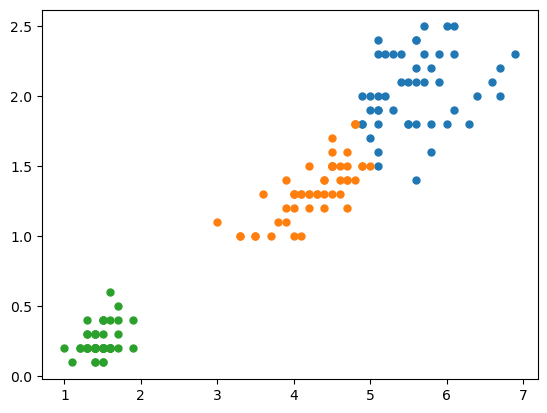

In [162]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [163]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(41, 2)
(58, 2)
(51, 2)


/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_73673/4013509759.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


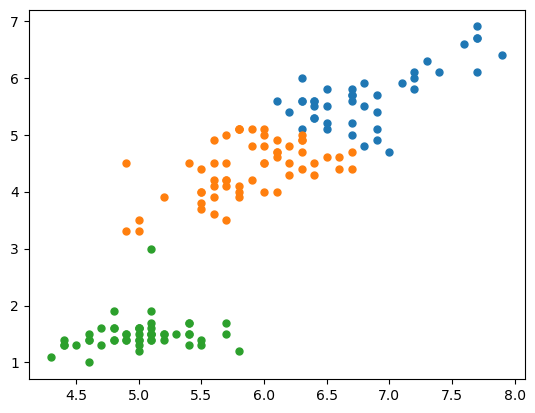

In [164]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [165]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [166]:
clf = KMeans(k = 3)
model = clf.train(X)

In [167]:
from mpl_toolkits.mplot3d import Axes3D

In [168]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])

/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_73673/484235372.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_73673/2997530603.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev = -150, azim = 130)


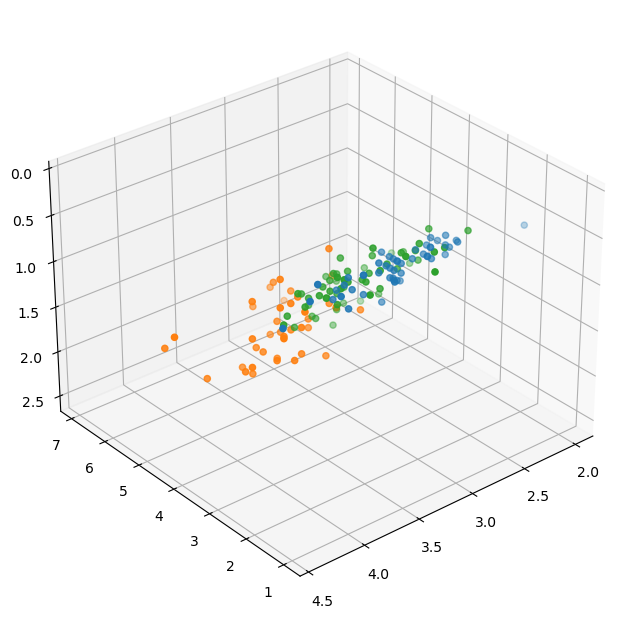

In [169]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [170]:
def gaussian(X, mu, cov):
    """ 
    Function to create mixtures using the given matrix X, given covariance and mu.
    ---
    Parameter:
        X: Input feature matrix
        mu: Mean of the cluster
        cov: Covariance of the cluster
    ---
    Return:
    transformed x.
    """
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    # Ensure cov is 2-dimensional. If it's 1D, convert it to 2D diagonal matrix.
    if cov.ndim == 1:
        cov = np.diag(cov)
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [171]:
from sklearn.datasets import make_blobs

In [172]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_73673/2540501731.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev = -150, azim = 130)


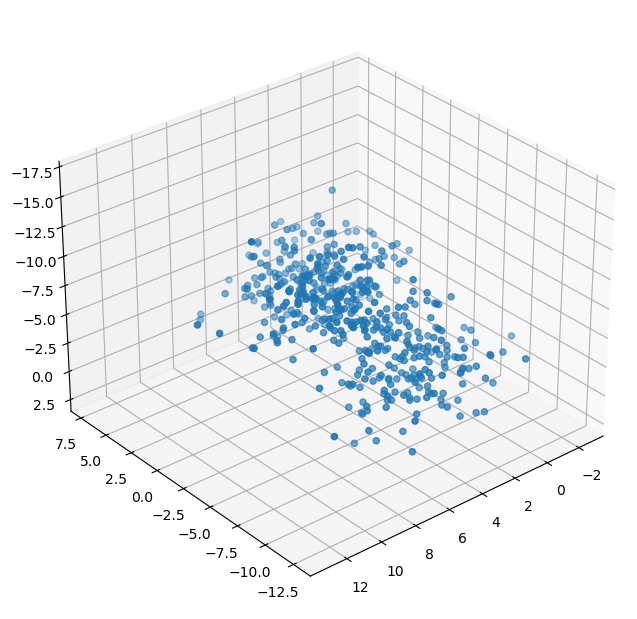

In [173]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')

In [174]:
def initialize_clusters(X, n_clusters):
    """ 
    Initialize the clusters by storing the information in the data matrix X into the clusters
    ---
    Parameter:
        X: Input feature matrix
        n_clusters: Number of clusters we are trying to classify
    ---
    Return:
        cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    kmeans = KMeans().train(X)
    mu_k = kmeans.centers
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [175]:
def expectation_step(X, clusters):
    """ 
    "E-Step" for the GM algorithm

    Parameter:
        X: Input feature matrix
        clusters: List of clusters
    """
    N = X.shape[0]
    K = len(clusters)  # Number of clusters
    totals = np.zeros((N, 1), dtype=np.float64)  # Initialize totals for each data point
    
    # Compute the probability of each data point in each cluster
    for cluster in clusters:
        pi_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        # Calculate the Gaussian probability for each data point for this cluster
        prob = gaussian(X, mu_k, cov_k) * pi_k  # Weighted by the cluster weight
        cluster['prob'] = prob  # Store the weighted probability for later use
        totals += prob  # Summing the weighted probabilities for normalization
    
    # Calculate and store the posterior probabilities for each cluster
    for cluster in clusters:
        cluster['posterior'] = cluster['prob'] / totals  # Normalize to get posterior probabilities

    # Update totals in each cluster dictionary for consistency
    for cluster in clusters:
        cluster['totals'] = totals

In [176]:
def maximization_step(X, clusters):
    """ 
    "M-Step" for the GM algorithm
    ---
    Parameter:
        X: Input feature matrix
        clusters: List of clusters
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior'].reshape(-1)  # Ensure posterior is a 1D array for easier handling
        N_k = posterior.sum()
        
        # Update weights
        w_k = N_k / N
        
        # Update means
        mu_k = np.dot(posterior, X) / N_k
        
        # Update covariance
        diff = X - mu_k
        cov_k = np.dot(posterior * diff.T, diff) / N_k  # Adjusted for correct broadcasting
        
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = np.diag(cov_k)  # Ensure covariance is correctly shaped, assuming independence

In [177]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [178]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [184]:
from KMeans import *
from GMM import *

In [185]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [186]:
from sklearn.cluster import KMeans

In [187]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[ 6.46033194 -4.88080339 -9.03235262]
 [ 4.01699648 -7.74534652 -3.62162065]
 [ 4.00889252  1.83714773 -6.26420002]]
Means by our implementation:
 [[ 3.99375289 -7.69927281 -3.73291197]
 [ 4.02253177  1.79629288 -6.21503362]
 [ 6.57221286 -4.85461881 -9.17065725]]
Scores by sklearn:
 [-8.26745457 -6.82555995 -7.53796764 -7.28490235 -6.30751238 -7.23839795
 -7.91400021 -7.14418795 -6.33465371 -6.42394775 -6.17705125 -7.25119469
 -7.42481077 -6.96487272 -6.18757443 -6.02977968 -5.9456466  -6.7118003
 -6.0783801  -6.91615466]
Scores by our implementation:
 [-8.28929195 -6.83103795 -7.56029137 -7.25605878 -6.28125525 -7.25556273
 -7.66605749 -6.97570411 -6.42912529 -6.48895712 -6.17145408 -7.35136169
 -7.23489756 -7.18837047 -6.21545156 -6.01703779 -5.99190093 -6.74850933
 -6.10098935 -6.91588056]
